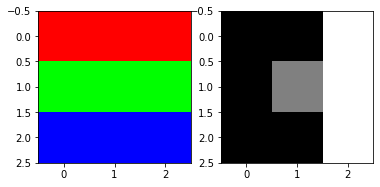

In [1]:
import cinemasci
import numpy

# create 3x3 pixel image with an rgb and a scalar channel
image = cinemasci.Image()
image.channel['RGB'] = numpy.array(
    [
        255,0,0,  255,0,0,  255,0,0, # three pixels of the first row (each pixel has an rgb value)
        0,255,0,  0,255,0,  0,255,0, # three pixels of the second row
        0,0,255,  0,0,255,  0,0,255  # three pixels of the third row
    ],
    dtype=numpy.uint8 # data type of the pixels are 8bit unsigned integers
).reshape( (3,3,3) )  # 3x3 pixels with 3 values for each pixel

image.channel['SomeScalar'] = numpy.array(
    [
        0.0, 0.0, 1.0, # three pixels of the first row (each pixel has one scalar value)
        0.0, 0.5, 1.0, # three pixels of the second row
        0.0, 0.0, 1.0  # three pixels of the third row
    ],
    dtype=numpy.float32 # data type of the pixels are 32bit floats
).reshape( (3,3,1) )    # 3x3 pixels with one value for each pixel

# display channels
from matplotlib import pyplot
fig = pyplot.figure()
fig.add_subplot(1, 2, 1)
pyplot.imshow(image.channel['RGB'])
fig.add_subplot(1, 2, 2)
pyplot.imshow(image.channel['SomeScalar'], interpolation='nearest', cmap='gray')

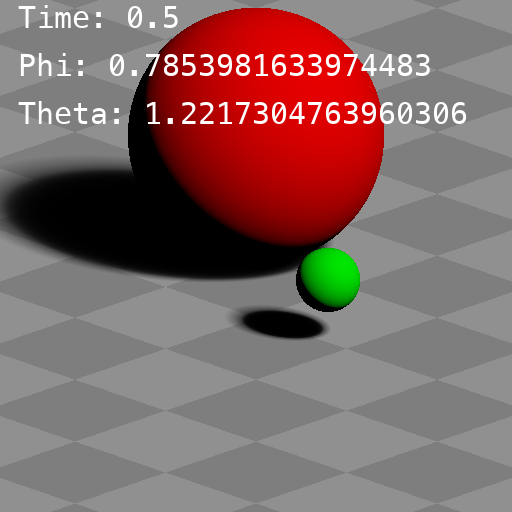

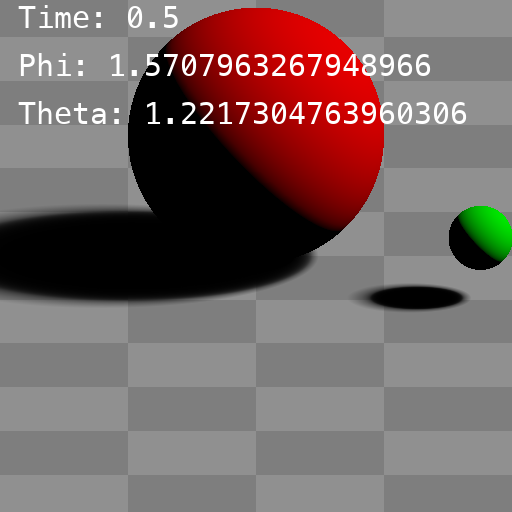

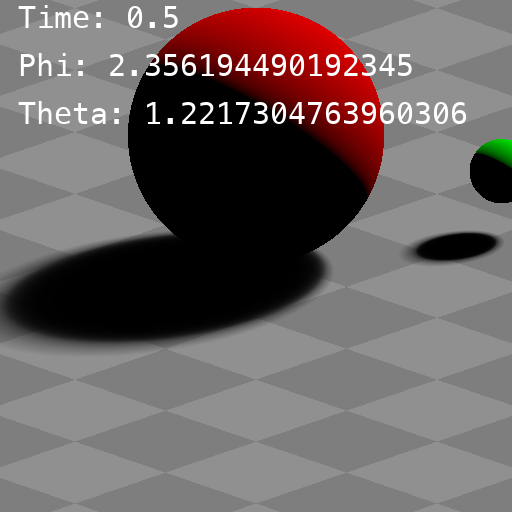

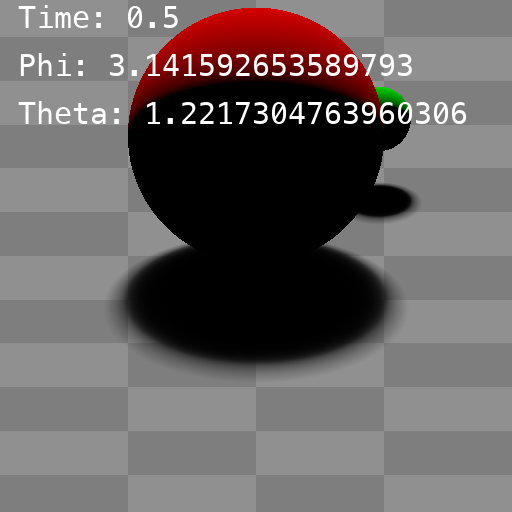

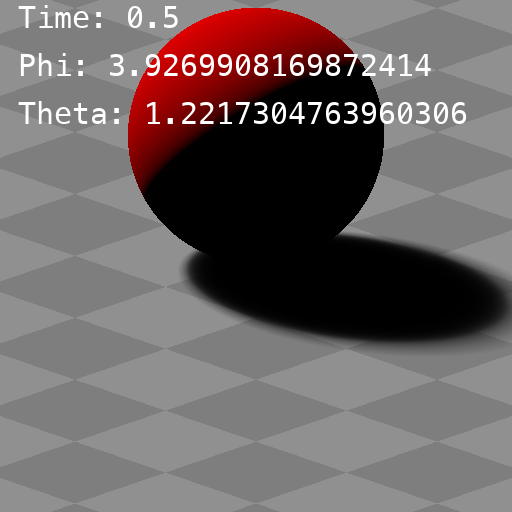

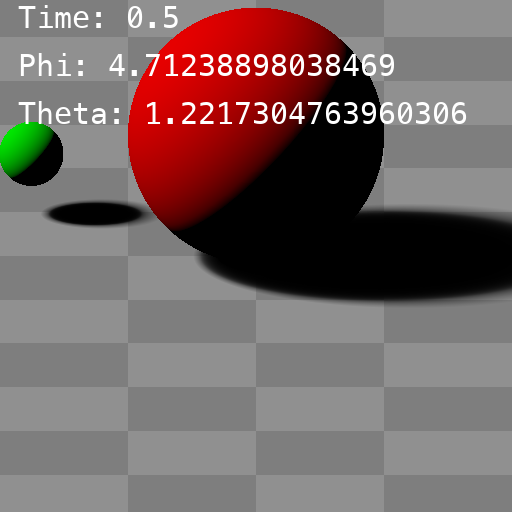

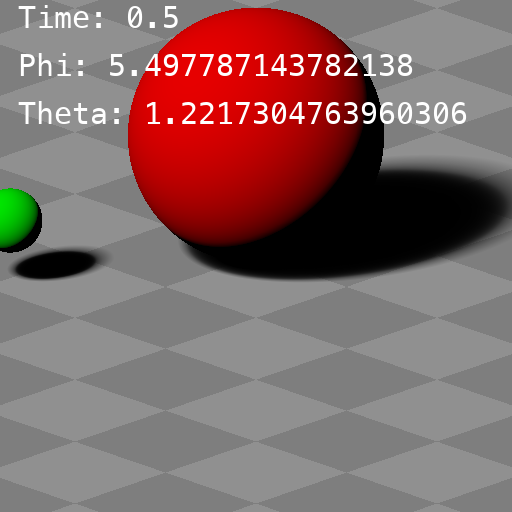

In [2]:
import cinemasci
demo = cinemasci.DemoCDB()
demo.inputs.Resolution.set((512,512),False)
demo.inputs.PhiSamples.set((45,360,45),False)
demo.inputs.ThetaSamples.set((20,20,45),False)
demo.inputs.Time.set(0.5)

annotation = cinemasci.Annotation()
annotation.inputs.Color.set( (255,255,255), False )
annotation.inputs.Size.set( 30, False )
annotation.inputs.XY.set( (0,0), False )
annotation.inputs.Spacing.set( 20, False )
annotation.inputs.Images.set( demo.outputs.Images )

import PIL
images = annotation.outputs.Images.get();
for i in images:
    display(PIL.Image.fromarray(i.channel['RGB']))